# **Duplicate Question Pairs**

### Basic EDA on dataset

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# importing dataset

df = pd.read_csv('questions.csv')
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
107471,107471,75833,90870,Can anime exist in a different parallel universe?,Can anime exist in a parallel universe of some...,1
326896,326896,453269,453270,Do people who take pain in the name of God fin...,How do I stop feeling nervous when I am in a w...,0
103632,103632,171245,171246,"Out of 29 states of India, Which is your favor...","Which state in India, apart from your home sta...",1
205239,205239,308328,308329,Who is Conor McGregor?,Why is conor McGregor retiring?,0
328496,328496,455040,343768,How can I recover deleted photos from app lock...,How can I recover deleted data from app lock?,1


In [3]:
# checking shape of dataset

df.shape

(363861, 6)

In [4]:
# checking info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363861 entries, 0 to 363860
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            363861 non-null  int64 
 1   qid1          363861 non-null  int64 
 2   qid2          363861 non-null  int64 
 3   question1     363860 non-null  object
 4   question2     363859 non-null  object
 5   is_duplicate  363861 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.7+ MB


In [5]:
# checking for null values

df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# checking for duplicate values

df.duplicated().sum()

0

In [9]:
# checking counts of target variable

print(df['is_duplicate'].value_counts())
round((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100, 2)

# data is quite imbalanced

is_duplicate
0    228686
1    135175
Name: count, dtype: int64


is_duplicate
0    62.85
1    37.15
Name: count, dtype: float64

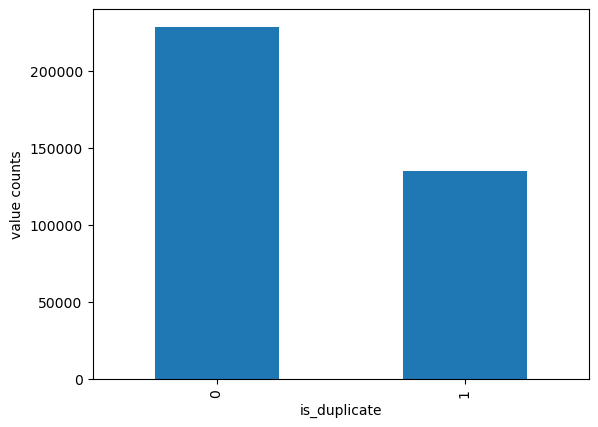

In [11]:
# bar graph for target variable 

df['is_duplicate'].value_counts().plot(kind='bar')
plt.ylabel("value counts")
plt.show()

# data is imbalanced

In [15]:
# checking for repeated questions

q_ids = pd.Series(df['qid1'].to_list() + df['qid2'].to_list())
print('Number of unique questions in data is ', np.unique(q_ids).shape[0])
repeated_q = q_ids.value_counts()>1
print('Number of repeated questions in data is ', repeated_q[repeated_q].shape[0])

Number of unique questions in data is  493889
Number of repeated questions in data is  98895


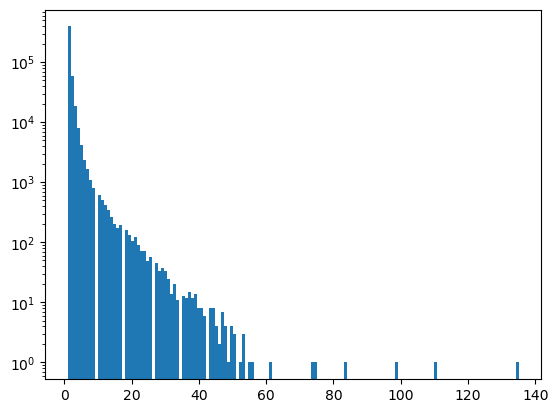

In [17]:
# plotting above obesrvations

plt.hist(q_ids.value_counts(), bins=150)
plt.yscale('log')
plt.show()